## Install Dependencies

In [ ]:
!pip install orient_express --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 33.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.2/117.2 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.1/69.1 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 385.8/385.8 kB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.5/133.5 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.7/59.7 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 45.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 4.8 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires ipykernel==5.5.6, but you have ipykernel 6.29.5 which is incompatible.


## Simulate Dwarf/Goblin Dataset

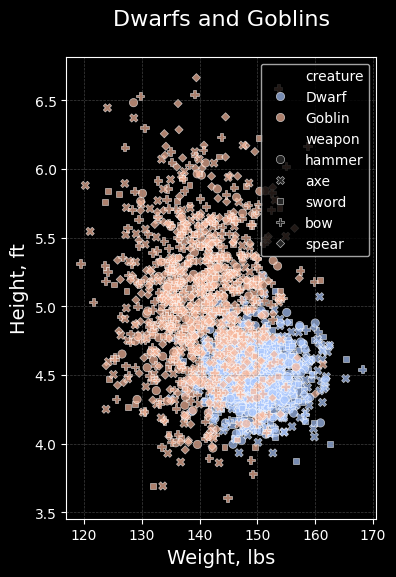

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

dwarf_height = np.random.normal(4.5, 0.2, 1000)
dwarf_width = np.random.normal(150, 5, 1000)
dwarf_weapon = np.random.choice(
    ['axe', 'hammer', 'sword', 'bow', 'spear'],
    p = [0.4, 0.3, 0.2, 0.05, 0.05],
    size=1000
)

dwarf_df = pd.DataFrame({
        'creature': 'Dwarf',
        'height': dwarf_height,
        'weight': dwarf_width,
        'weapon': dwarf_weapon
    })


goblin_height = np.random.normal(5.0, 0.5, 1000)
goblin_width = np.random.normal(140, 7, 1000)
goblin_weapon = np.random.choice(
    ['axe', 'hammer', 'sword', 'bow', 'spear'],
    p = [0.2, 0.1, 0.1, 0.3, 0.3],
    size=1000
)
goblin_df = pd.DataFrame({
        'creature': 'Goblin',
        'height': goblin_height,
        'weight': goblin_width,
        'weapon': goblin_weapon
    })

df = pd.concat([dwarf_df, goblin_df],
               ignore_index=True)


# use dark theme
plt.style.use('dark_background')

# Visualizing with a scatter plot colored by creature and weapon
plt.figure(figsize=(4, 6))
sns.scatterplot(
    data=df,
    x='weight',
    y='height',
    hue='creature',
    style='weapon',
    palette='coolwarm',
    alpha=0.7
)
plt.title('Dwarfs and Goblins\n', fontsize=16)
plt.xlabel('Weight, lbs', fontsize=14)
plt.ylabel('Height, ft', fontsize=14)
# plt.legend(title='Creature / Weapon', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.5)
plt.show()


## Analyse Data With t-SNE

In [ ]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import pandas as pd
import numpy as np


# Define the preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['height', 'weight']),
        ('cat', OneHotEncoder(), ['weapon'])
    ]
)

# Define the pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('tsne', TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000))
])

# Fit and transform using the pipeline
# Ensure input to pipeline is a DataFrame
tsne_results = pipeline.fit_transform(df)

# Add t-SNE results to the DataFrame
df['tsne_x'] = tsne_results[:, 0]
df['tsne_y'] = tsne_results[:, 1]

print(df)


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


     creature    height      weight  weapon     tsne_x     tsne_y
0       Dwarf  4.917050  148.193347  hammer -12.843067 -33.292953
1       Dwarf  4.622005  152.985519     axe -32.165066  22.568386
2       Dwarf  4.444761  149.686871  hammer -24.592661 -42.667179
3       Dwarf  4.399463  147.561754     axe -31.521679   5.986867
4       Dwarf  4.719704  152.629735  hammer -27.220488 -31.292210
...       ...       ...         ...     ...        ...        ...
1995   Goblin  5.704551  128.275001     bow  14.896404 -14.636344
1996   Goblin  5.194867  135.494804     bow  17.815334 -20.660828
1997   Goblin  5.311096  138.001863     axe  -4.579998   1.137767
1998   Goblin  5.015393  152.277975     bow  36.978523 -19.801228
1999   Goblin  3.694122  131.987857   sword  -2.953902  33.902020

[2000 rows x 6 columns]


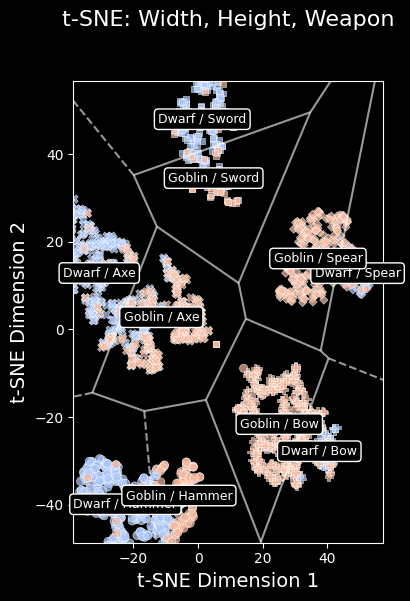

In [ ]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler, LabelEncoder
from scipy.spatial import Voronoi, voronoi_plot_2d
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Step 4: Plot Voronoi Diagram with Scatter Points and Titles
plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(4, 6))


# Group by creature + weapon and take the mean t-SNE coordinates as centers
df['group'] = df['creature'] + ' / ' + df['weapon'].str.capitalize()
group_centers = df.groupby('group')[['tsne_x', 'tsne_y']].mean().reset_index()

# Compute Voronoi diagram
vor = Voronoi(group_centers[['tsne_x', 'tsne_y']].values)

# Plot Voronoi regions
voronoi_plot_2d(vor, ax=ax, show_vertices=False, line_colors='white',
                line_width=1.5, line_alpha=0.6, point_size=0)

# Plot scatter points (t-SNE results)
sns.scatterplot(
    x='tsne_x',
    y='tsne_y',
    hue='creature',
    style='weapon',
    data=df,
    palette='coolwarm',
    alpha=0.7,
    ax=ax
)

# Add weapon labels at the centers of Voronoi regions
for i, row in group_centers.iterrows():
    ax.text(row['tsne_x'], row['tsne_y'], row['group'],
            fontsize=9, color='white', ha='center', va='center',
            bbox=dict(facecolor='black', edgecolor='white',  boxstyle='round,pad=0.3'))

# Customize the plot
plt.title('t-SNE: Width, Height, Weapon\n\n', fontsize=16)
plt.xlabel('t-SNE Dimension 1', fontsize=14)
plt.ylabel('t-SNE Dimension 2', fontsize=14)
plt.gca().legend().remove()
# plt.legend(title='Creature / Weapon', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

## Create Scikit-Learn Pipeline

* Data preprocessor
* XGBClassifier
* Output label encoder (to map classes back to their labels)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
from orient_express.sklearn_pipeline import LabelEncoderTransformer


# Separate features and target
X = df[['height', 'weight', 'weapon', 'creature']]
y = df['creature']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Define a preprocessor with StandardScaler for numeric features
# and OneHotEncoder for categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['height', 'weight']),
        ('cat', OneHotEncoder(drop='first'), ['weapon'])
    ]
)

label_encoder = LabelEncoder()
label_encoder.fit(y)

# Create an XGBoost pipeline with label encoding as a step
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LabelEncoderTransformer(
        model=XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
        label_encoder=label_encoder
    ))
])

# Train the model
pipeline.fit(X_train, label_encoder.transform(y_train))

# Make predictions
y_pred = pipeline.predict(X_test)

# Evaluate the model
report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)
print(report)

              precision    recall  f1-score   support

       Dwarf       0.89      0.93      0.90       200
      Goblin       0.92      0.88      0.90       200

    accuracy                           0.90       400
   macro avg       0.90      0.90      0.90       400
weighted avg       0.90      0.90      0.90       400



/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [22:53:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


## Calculate Metrics and Features Importance

In [ ]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

       Dwarf       0.89      0.93      0.90       200
      Goblin       0.92      0.88      0.90       200

    accuracy                           0.90       400
   macro avg       0.90      0.90      0.90       400
weighted avg       0.90      0.90      0.90       400



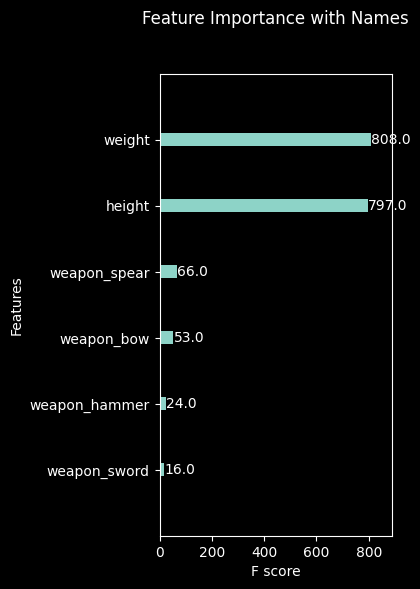

In [ ]:
import matplotlib.pyplot as plt
from xgboost import plot_importance

# Create a figure with specified size
fig, ax = plt.subplots(figsize=(3, 6))

xgb_model = pipeline.named_steps['classifier'].model
num_features = preprocessor.named_transformers_['num'].feature_names_in_
cat_features = preprocessor.named_transformers_['cat'].get_feature_names_out(['weapon'])
feature_names = list(num_features) + list(cat_features)

# Set the feature names in the XGBoost booster
xgb_model.get_booster().feature_names = feature_names

# Plot feature importance on the specified axis
plot_importance(xgb_model.get_booster(), importance_type='weight', max_num_features=10, grid=False, ax=ax)

# Set a title if needed
ax.set_title("Feature Importance with Names\n\n")

# Show the plot
plt.show()
